<a href="https://colab.research.google.com/github/dev02chandan/ATML/blob/main/Outlier_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Aim:
To explore distance and density based outlier detection algorithms.

### Task 1: Outlier detection on a 2 dimensional data

Generate a 2 Dimensional array of 15 random (in the range of 0 to 20) data points and visualize the generated array.

· Use kmeans clustering with either 3 or 4 clusters. Train the model with the data. Plot the clusters thus formed.

· Obtain the centres of the clusters

· Define array - used to reach the index.

· Define array - used to calculate outlier distances

· Set threshold

· Determine outliers.

· Change the value of k and note the outliers.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
data = np.random.randint(0, 21, size=(15,2))
data

array([[ 6,  5],
       [10,  3],
       [ 3, 13],
       [17, 18],
       [ 3,  1],
       [15,  8],
       [13,  2],
       [13,  1],
       [20,  4],
       [ 1, 20],
       [ 0, 20],
       [17, 13],
       [ 3,  5],
       [19, 13],
       [13, 19]])

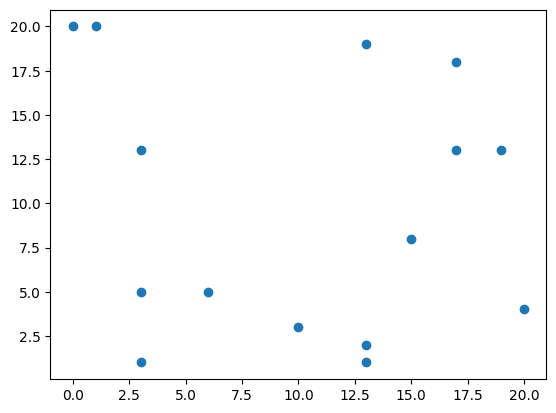

In [ ]:
plt.scatter(data[:, 0] , data[: , 1])

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
k = 3
k_means = KMeans(k)

In [ ]:
k_means.fit(data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [ ]:
cluster_assignment = k_means.labels_
cluster_assignment

array([0, 0, 2, 1, 0, 1, 0, 0, 1, 2, 2, 1, 0, 1, 1], dtype=int32)

In [ ]:
cluster_centroids = k_means.cluster_centers_
cluster_centroids

array([[ 8.        ,  2.83333333],
       [16.83333333, 12.5       ],
       [ 1.33333333, 17.66666667]])

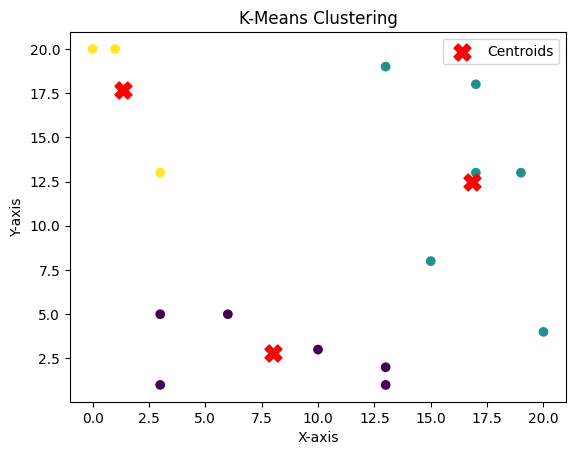

In [ ]:
plt.scatter(data[:, 0], data[:, 1], c = cluster_assignment)
plt.scatter(cluster_centroids[:, 0], cluster_centroids[:, 1], c='red', marker='X', s=150, label='Centroids')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('K-Means Clustering')
plt.legend()
plt.show()

In [ ]:
arr = []
for i in range(len(data)):
    cluster = cluster_assignment[i]
    x1 = data[i][0]
    y1 = data[i][1]
    x2 = cluster_centroids[cluster][0]
    y2 = cluster_centroids[cluster][1]
    value = ((x1 - x2)**2 + (y1 - y2)**2)**(0.5)
    arr.append(value)
arr

[2.948634335492355,
 2.006932429798716,
 4.955356249106166,
 5.50252467307306,
 5.325515102890153,
 4.85912657903775,
 5.068968775248517,
 5.325515102890153,
 9.070709882791853,
 2.3570226039551607,
 2.6874192494328524,
 0.5270462766947303,
 5.449260908090605,
 2.22361067735439,
 7.54615428178118]

In [ ]:
threshold = 5

In [ ]:
markers = [1 if i > threshold else 0 for i in arr]

In [ ]:
markers

[0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1]

In [ ]:
anomalities = data[np.array(markers) == 1]

In [ ]:
anomalities

array([[17, 18],
       [ 3,  1],
       [13,  2],
       [13,  1],
       [20,  4],
       [ 3,  5],
       [13, 19]])

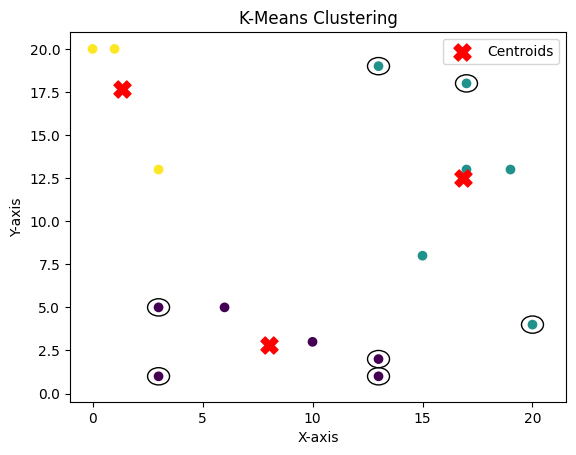

In [ ]:
from matplotlib.patches import Circle

plt.scatter(data[:, 0], data[:, 1], c = cluster_assignment)
plt.scatter(cluster_centroids[:, 0], cluster_centroids[:, 1], c='red', marker='X', s=150, label='Centroids')
# Highlight anomalies with circles
for i in range(len(data)):
    if markers[i] == 1:
        x, y = data[i]
        circle = Circle((x, y), radius=0.5, color='black', fill=False)
        plt.gca().add_patch(circle)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('K-Means Clustering')
plt.legend()
plt.show()

### Task 2: Anomaly detection of randomly generated regression data

· Using a random seed, generate data points

· Repeat the steps in task 1 above.

· Plot the outliers.

In [ ]:
x = np.random.randint(0, 21, size=(15))
y = 2*x + np.random.randint(0, 3, size=(15))

print(x,y)


[ 5  2  2 12  2  2 11 20 10 11  7  5  1  3  3] [29 19  7 36 24 12 33 44 20 41 20 17 14 12  6]


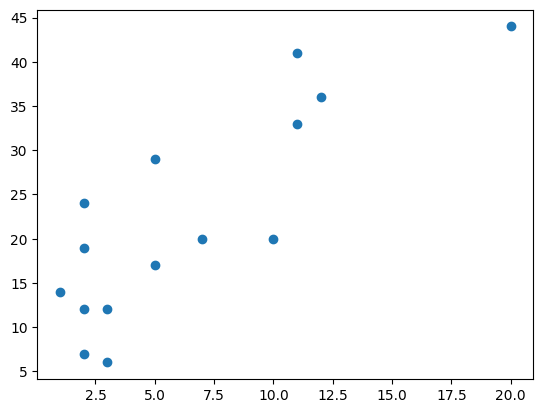

In [ ]:
plt.scatter(x,y)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
x.shape

(15,)

In [ ]:
# Reshape the data to a 2D array (required by scikit-learn)
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

In [ ]:
x.shape

(15, 1)

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(x,y)

LinearRegression()

In [ ]:
y_pred = model.predict(x)

In [ ]:
slope = model.coef_[0][0]
intercept = model.intercept_[0]

In [ ]:
print(f"Regression Line Equation: y = {slope:.2f}x + {intercept:.2f}")

Regression Line Equation: y = 1.85x + 10.43


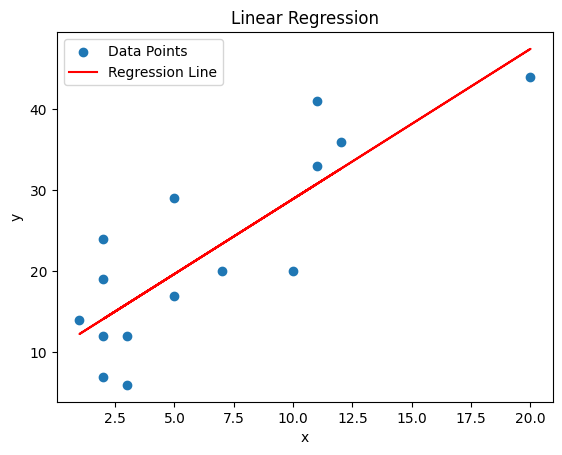

In [ ]:
# Visualize the data and the regression line
plt.scatter(x, y, label='Data Points')
plt.plot(x, y_pred, color='red', label='Regression Line')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression')
plt.legend()
plt.show()

In [ ]:
distances = np.abs(y - (slope * x + intercept)) / np.sqrt(1 + slope ** 2)

In [ ]:
distances

array([[4.43328658],
       [2.31746375],
       [3.38850527],
       [1.60374869],
       [4.69495084],
       [1.01101818],
       [1.05697355],
       [1.6300089 ],
       [4.24477577],
       [4.8609529 ],
       [1.60562442],
       [1.27268244],
       [0.81969377],
       [1.8907353 ],
       [4.7437198 ]])

In [ ]:
threshold = 3

In [ ]:
# Find the indices of outliers
outlier_indices = np.where(distances > threshold)[0]

In [ ]:
outlier_indices

array([ 0,  2,  4,  8,  9, 14])

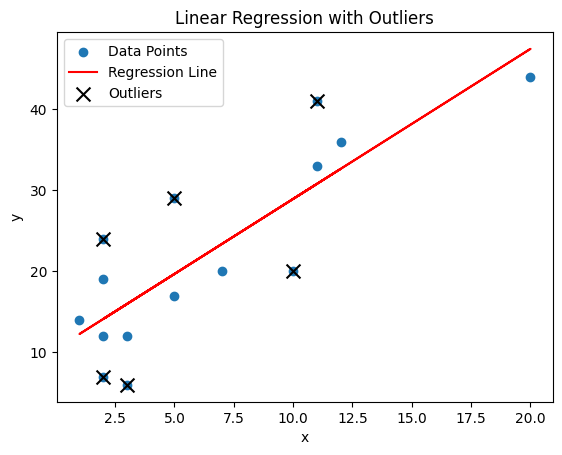

In [ ]:
plt.scatter(x, y, label='Data Points')
plt.plot(x, y_pred, color = 'red', label='Regression Line')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression with Outliers')
plt.legend()

# Highlight outliers
plt.scatter(x[outlier_indices], y[outlier_indices], color='black', marker='x', s=100, label='Outliers')
plt.legend()

### Task 3: Anomaly detection applied on suitable regression data.

· Select a suitable data and detect outliers using linear regression  and setting an appropriate threshold.

In [ ]:
dataset = pd.read_csv('/content/sample_data/california_housing_test.csv')

In [ ]:
dataset

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0
...,...,...,...,...,...,...,...,...,...
2995,-119.86,34.42,23.0,1450.0,642.0,1258.0,607.0,1.1790,225000.0
2996,-118.14,34.06,27.0,5257.0,1082.0,3496.0,1036.0,3.3906,237200.0
2997,-119.70,36.30,10.0,956.0,201.0,693.0,220.0,2.2895,62000.0
2998,-117.12,34.10,40.0,96.0,14.0,46.0,14.0,3.2708,162500.0


import numpy as np
from google.colab import autoviz
df_1360685267812275397 = autoviz.get_df('df_1360685267812275397')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_1360685267812275397, *['longitude'], **{})
chart

import numpy as np
from google.colab import autoviz
df_1360685267812275397 = autoviz.get_df('df_1360685267812275397')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_1360685267812275397, *['latitude'], **{})
chart

import numpy as np
from google.colab import autoviz
df_1360685267812275397 = autoviz.get_df('df_1360685267812275397')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_1360685267812275397, *['housing_median_age'], **{})
chart

import numpy as np
from google.colab import autoviz
df_1360685267812275397 = autoviz.get_df('df_1360685267812275397')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_1360685267812275397, *['total_rooms'], **{})
chart

import numpy as np
from google.colab import autoviz
df_1360685267812275397 = autoviz.get_df('df_1360685267812275397')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_1360685267812275397, *['longitude'], **{})
chart

import numpy as np
from google.colab import autoviz
df_1360685267812275397 = autoviz.get_df('df_1360685267812275397')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_1360685267812275397, *['latitude'], **{})
chart

import numpy as np
from google.colab import autoviz
df_1360685267812275397 = autoviz.get_df('df_1360685267812275397')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_1360685267812275397, *['housing_median_age'], **{})
chart

import numpy as np
from google.colab import autoviz
df_1360685267812275397 = autoviz.get_df('df_1360685267812275397')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_1360685267812275397, *['total_rooms'], **{})
chart

import numpy as np
from google.colab import autoviz
df_1360685267812275397 = autoviz.get_df('df_1360685267812275397')

def scatter_plots(df, colname_pairs, scatter_plot_size=2.5, size=8, alpha=.6):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * scatter_plot_size, scatter_plot_size))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    ax.scatter(df[x_colname], df[y_colname], s=size, alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df_1360685267812275397, *[[['longitude', 'latitude'], ['latitude', 'housing_median_age'], ['housing_median_age', 'total_rooms'], ['total_rooms', 'total_bedrooms']]], **{})
chart

Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [ ]:
dataset.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [ ]:
y = dataset['median_house_value']
x = dataset.drop(['median_house_value'], axis=1)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test , y_train, y_test = train_test_split(x, y, test_size=0.2)

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
print("Intercept: ", model.intercept_)
print("Coefficients:")
list(zip(x, model.coef_))

Intercept:  -3585102.418487291
Coefficients:


[('longitude', -42900.473931292465),
 ('latitude', -42914.03876196057),
 ('housing_median_age', 1161.355192705655),
 ('total_rooms', -8.109042375257559),
 ('total_bedrooms', 101.69708782095586),
 ('population', -35.133726681124244),
 ('households', 47.30733680334197),
 ('median_income', 39111.2793421986)]

In [ ]:
print("Prediction for test set: {}".format(y_pred))

In [ ]:
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
mlr_diff.head()

,Actual value,Predicted value
0,255200.0,249489.509144
1,81300.0,79337.318139
2,139900.0,193251.920332
3,156300.0,210858.427639
4,193200.0,221988.221411


import numpy as np
from google.colab import autoviz
df_1534352077887008051 = autoviz.get_df('df_1534352077887008051')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_1534352077887008051, *['Actual value'], **{})
chart

import numpy as np
from google.colab import autoviz
df_1534352077887008051 = autoviz.get_df('df_1534352077887008051')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_1534352077887008051, *['Predicted value'], **{})
chart

import numpy as np
from google.colab import autoviz
df_1534352077887008051 = autoviz.get_df('df_1534352077887008051')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_1534352077887008051, *['Actual value'], **{})
chart

import numpy as np
from google.colab import autoviz
df_1534352077887008051 = autoviz.get_df('df_1534352077887008051')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_1534352077887008051, *['Predicted value'], **{})
chart

import numpy as np
from google.colab import autoviz
df_1534352077887008051 = autoviz.get_df('df_1534352077887008051')

def scatter_plots(df, colname_pairs, scatter_plot_size=2.5, size=8, alpha=.6):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * scatter_plot_size, scatter_plot_size))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    ax.scatter(df[x_colname], df[y_colname], s=size, alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df_1534352077887008051, *[[['Actual value', 'Predicted value']]], **{})
chart

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
model.coef_

array([-4.29004739e+04, -4.29140388e+04,  1.16135519e+03, -8.10904238e+00,
        1.01697088e+02, -3.51337267e+01,  4.73073368e+01,  3.91112793e+04])

In [ ]:
# Distance = |y - (mx + b)| / sqrt(1 + m^2)
distances = np.abs(y_test - y_pred)/ np.sqrt(1 + model.coef_[0]**2)

In [ ]:
distances

1204    0.133110
1348    0.045750
867     1.243621
325     1.271744
359     0.671047
          ...   
2709    0.113450
2229    0.486895
724     3.558022
138     1.819367
2071    1.227887
Name: median_house_value, Length: 600, dtype: float64

In [ ]:
threshold = 3

In [ ]:
outlier_indices = np.where( distances > threshold)

In [ ]:
outlier_indices

(array([  7,  51,  62,  87, 103, 110, 116, 134, 150, 166, 170, 186, 188,
        197, 218, 279, 295, 327, 347, 354, 368, 389, 413, 427, 435, 465,
        472, 490, 513, 523, 534, 545, 581, 597]),)

In [ ]:
# Out of 600 samples - we can say that the above are outliers

In [ ]:
y_test.index[outlier_indices]

Int64Index([2586, 1331, 1600, 1089, 1974,  986, 1795,  984,  128,  290, 2016,
            1558, 2640, 1071, 1367,  259,   25, 2041,  781, 1061,  719, 1513,
            1872,  283, 2092,  641, 2895, 1762, 2950, 2757,  280, 1359, 1356,
             724],
           dtype='int64')

In [ ]:
y_test

1204    255200.0
1348     81300.0
867     139900.0
325     156300.0
359     193200.0
          ...   
2709     98100.0
2229    194400.0
724     301600.0
138     181300.0
2071    165000.0
Name: median_house_value, Length: 600, dtype: float64

In [ ]:
import numpy as np

m, b = np.polyfit(y_test, y_pred, 1)


[19814.343512216376, 38192.664768624694, 18645.737308835804, 13175.266142615035, 866.7060186182867, 24450.901390903484, 25216.974014601008, 59775.46825082912, 11074.932258863659, 37025.18616607759, 47765.98930951106, 41094.68300924181, 19446.29406486813, 47832.702372513755, 42029.79349211296, 1733.9758376532816, 15011.002976022519, 36958.473103074895, 5871.313344653664, 23615.860502536405, 1200.271333631731, 63911.678156996044, 5436.550834302726, 35992.261290369286, 21414.329423447536, 17345.960181116752, 14143.733156987524, 40895.67142106715, 21414.329423447536, 25850.748113126585, 9339.265019960227, 2434.462999181554, 23917.196886881957, 6670.742499852525, 18011.963210310223, 66413.41801959704, 31954.993377872957, 33255.89810642545, 34356.663645969886, 8171.786417413098, 23248.9386560216, 20313.563883903123, 14442.814339666193, 20013.355100391014, 27886.62413554215, 4970.68699411731, 11707.578756555797, 5704.530687146917, 17745.110958299476, 3336.2169505513493, 36324.699004549315, 57

In [ ]:
distances = []
outliers = []  # List to store indices of outlier points
threshold = 40000

In [ ]:
for i in range(len(y_test)):
    x = y_test[i]
    y_actual = y_test[i]
    y_regression = m * x + b
    distance = abs(y_actual - y_regression) / np.sqrt(m**2 + 1)
    distances.append(distance)
    if distance > threshold:
        outliers.append(i)

In [ ]:
print("Distances:", distances)
print("Outliers:", outliers)

Distances: [19814.343512216376, 38192.664768624694, 18645.737308835804, 13175.266142615035, 866.7060186182867, 24450.901390903484, 25216.974014601008, 59775.46825082912, 11074.932258863659, 37025.18616607759, 47765.98930951106, 41094.68300924181, 19446.29406486813, 47832.702372513755, 42029.79349211296, 1733.9758376532816, 15011.002976022519, 36958.473103074895, 5871.313344653664, 23615.860502536405, 1200.271333631731, 63911.678156996044, 5436.550834302726, 35992.261290369286, 21414.329423447536, 17345.960181116752, 14143.733156987524, 40895.67142106715, 21414.329423447536, 25850.748113126585, 9339.265019960227, 2434.462999181554, 23917.196886881957, 6670.742499852525, 18011.963210310223, 66413.41801959704, 31954.993377872957, 33255.89810642545, 34356.663645969886, 8171.786417413098, 23248.9386560216, 20313.563883903123, 14442.814339666193, 20013.355100391014, 27886.62413554215, 4970.68699411731, 11707.578756555797, 5704.530687146917, 17745.110958299476, 3336.2169505513493, 36324.69900

### Task 4: Applying DBSCAN on randomly generated dataset.

· Generate random 2 dimensional data points.

· Use DBSCAN with appropriate parameters and identify the anomalies. Tune the parameters if required.

In [1]:
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN

In [17]:
X, _ = make_blobs(n_samples = 300, centers =3, random_state = 24, cluster_std = 1.0)

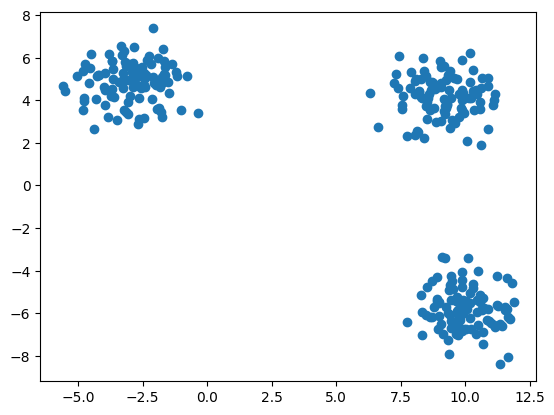

In [18]:
plt.scatter(X[:, 0], X[:, 1])

In [19]:
outliers = np.array([[-8, -5], [-2.5, -6], [0, 0]])

In [20]:
X = np.vstack([X, outliers])

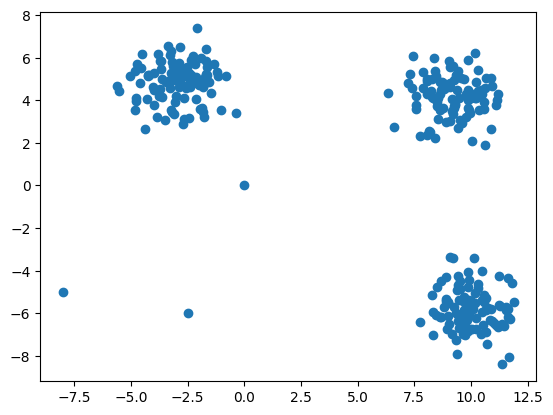

In [22]:
plt.scatter(X[:, 0], X[: , 1])

In [27]:
def dbscan(X, epsilon, min_points):
    dbscan = DBSCAN(eps = epsilon, min_samples=min_points)
    clusters = dbscan.fit_predict(X)

    outlier_indices = np.where(clusters == -1)[0]

    plt.scatter(X[:, 0], X[: , 1], c= 'blue', label='Data points')
    plt.scatter(X[outlier_indices, 0], X[outlier_indices, 1], c='red', label='Outliers', marker='x')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('DB SCAN Outlier detection')
    plt.legend()
    plt.show()

    return outlier_indices

In [28]:
epsilon = 0.5
min_points = 5

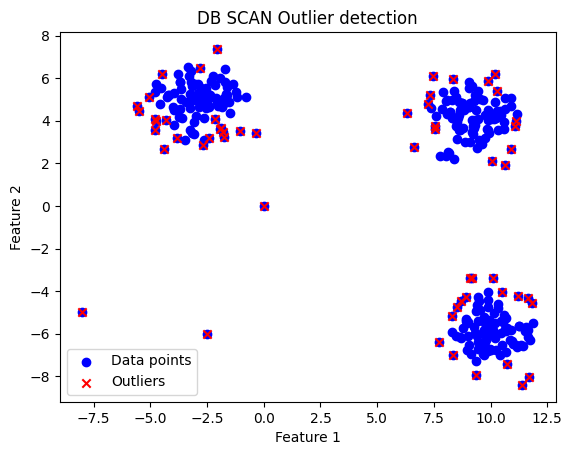

In [29]:
outlier_indices = dbscan(X, epsilon, min_points)

In [30]:
outlier_indices

array([  0,   2,  14,  15,  21,  42,  47,  52,  55,  57,  58,  79,  85,
        89,  90,  91,  98, 106, 110, 111, 119, 121, 132, 138, 141, 148,
       151, 153, 162, 165, 166, 175, 176, 178, 180, 212, 214, 219, 226,
       231, 237, 239, 243, 245, 249, 256, 261, 264, 274, 284, 285, 290,
       295, 297, 300, 301, 302])

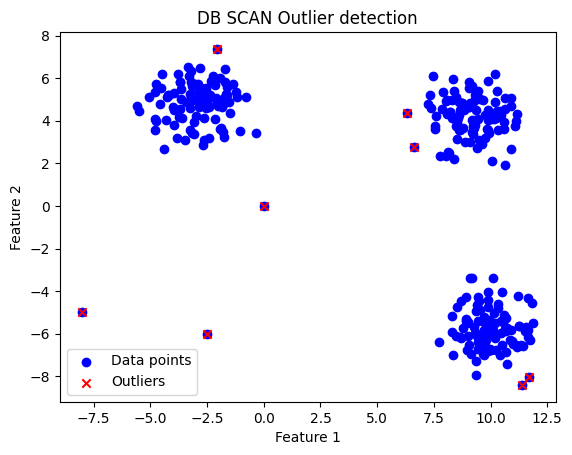

In [31]:
epsilon = 1
min_points = 5
outlier_indices = dbscan(X, epsilon, min_points)

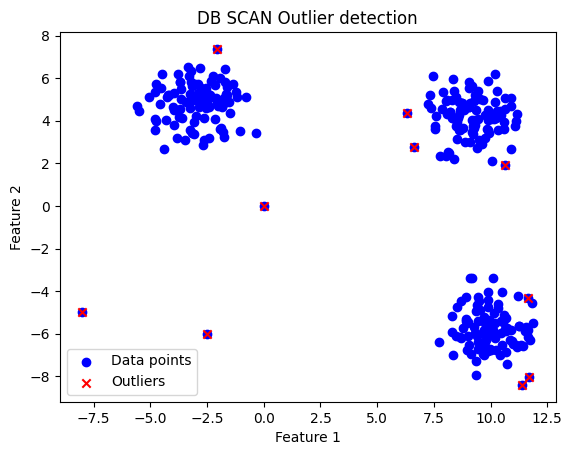

In [32]:
epsilon = 1
min_points = 7
outlier_indices = dbscan(X, epsilon, min_points)

### Task 5: Apply DBSCAN to detect outliers on a real dataset.

· Take any dataset of your choice.

· Identify outliers by using DBSCAN.

In [33]:
from sklearn.datasets import load_iris

In [37]:
data = load_iris()
X = data.data

In [41]:
from mpl_toolkits.mplot3d import Axes3D

def dbscan(X, epsilon, min_points):
    dbscan = DBSCAN(eps=epsilon, min_samples=min_points)
    clusters = dbscan.fit_predict(X)

    outlier_indices = np.where(clusters == -1)[0]

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c='blue', label='Data points')
    ax.scatter(X[outlier_indices, 0], X[outlier_indices, 1], X[outlier_indices, 2], c='red', label='Outliers', marker='x')
    ax.set_xlabel('Sepal Length')
    ax.set_ylabel('Sepal Width')
    ax.set_zlabel('Petal Length')
    ax.set_title('DBSCAN Outlier Detection (3D)')
    ax.legend()

    plt.show()

    return outlier_indices


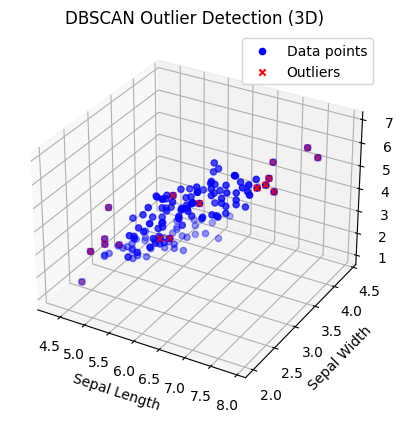

array([ 41,  57,  60,  68,  87,  93,  98, 105, 106, 108, 109, 117, 118,
       122, 131, 134, 135])

In [42]:
dbscan(X, epsilon=0.5, min_points = 5)

# Conclusion

In conclusion, we can say that we have tried multiple techniques for finding the outliers like K-means, linear regerssion and DBSCAN.
Outlier detection.

The experiment compared linear regression, K-Means, and DBSCAN for outlier detection.

Linear regression identifies large residuals as potential outliers but is limited for complex datasets.
K-Means can detect data points far from centroids, but it's not specialized for outlier detection.
DBSCAN shows promise, effectively handling irregular clusters and noise.
DBSCAN's density-based nature and parameter flexibility make it a strong outlier detection method.